In [ ]:
import pandas as pd

In [ ]:
# Import the data set for KNN algorithm
dataset = pd.read_csv('purchase_or_not.csv')
# storing the input values in the X variable
X = dataset.iloc[:,[0,1]].values
# storing all the ouputs in y variable
y = dataset.iloc[:,2].values

In [ ]:
# importing the train_test_split method from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [ ]:
#scaling data
# applying standard scale method
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# scaling training and testing data set
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# importing KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
# K value set to be 3
classifer = KNeighborsClassifier(n_neighbors=3)
# model training
classifer.fit(X_train,y_train)
# testing the model
y_pred= classifer.predict(X_test)

In [ ]:
# importing accuracy_score
from sklearn.metrics import accuracy_score
# printing accuracy
print(accuracy_score(y_test,y_pred))

0.8484848484848485


0.8484848484848485


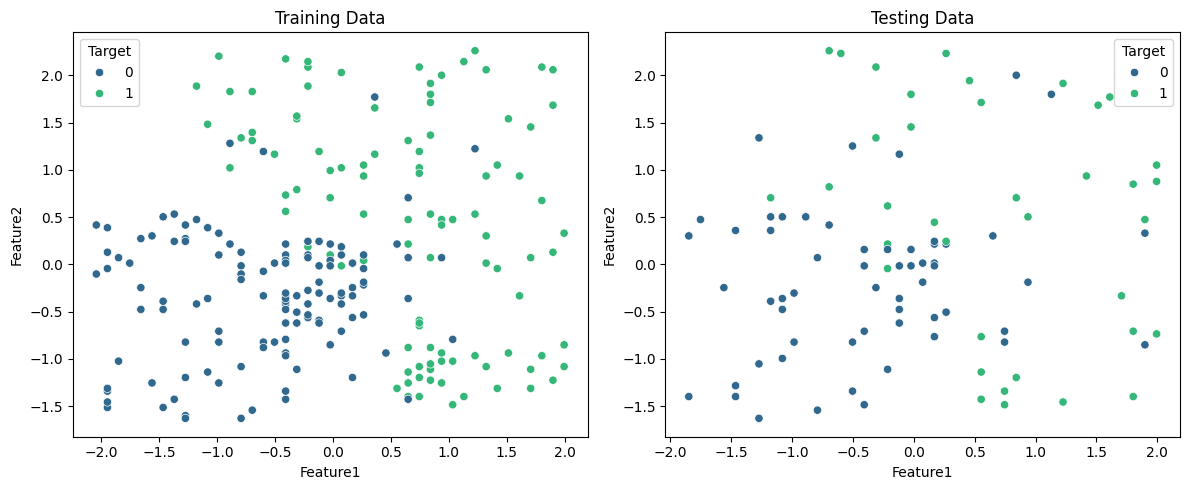

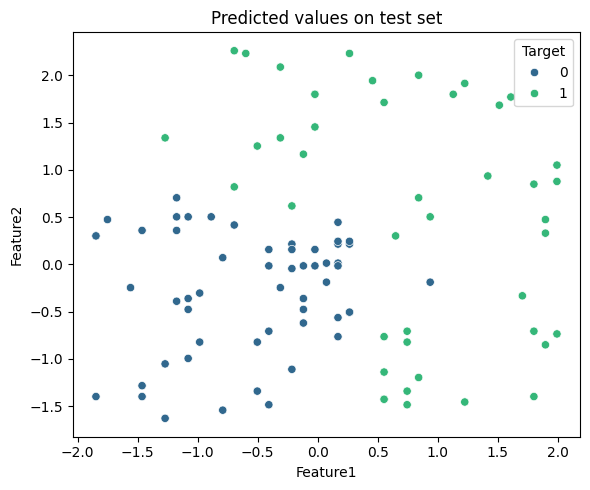

In [ ]:
# prompt: visualise

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Create a dummy dataset if 'purchase_or_not.csv' does not exist
try:
  dataset = pd.read_csv('purchase_or_not.csv')
except FileNotFoundError:
  print("File 'purchase_or_not.csv' not found. Generating a dummy dataset.")
  X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
  dataset = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
  dataset['Target'] = y
  dataset.to_csv('purchase_or_not.csv', index=False)
  dataset = pd.read_csv('purchase_or_not.csv')

# storing the input values in the X variable
X = dataset.iloc[:,[0,1]].values
# storing all the ouputs in y variable
y = dataset.iloc[:,2].values
# importing the train_test_split method from sklearn
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
#scaling data
# applying standard scale method
sc = StandardScaler()
# scaling training and testing data set
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# importing KNN algorithm
# K value set to be 3
classifer = KNeighborsClassifier(n_neighbors=3)
# model training
classifer.fit(X_train,y_train)
# testing the model
y_pred= classifer.predict(X_test)
# importing accuracy_score
# printing accuracy
print(accuracy_score(y_test,y_pred))

# Visualization
# Create a DataFrame for the training data for easier plotting
train_df = pd.DataFrame(X_train, columns=['Feature1', 'Feature2'])
train_df['Target'] = y_train

# Create a DataFrame for the testing data for easier plotting
test_df = pd.DataFrame(X_test, columns=['Feature1', 'Feature2'])
test_df['Target'] = y_test

# Scatter plot of training data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Feature1', y='Feature2', hue='Target', data=train_df, palette='viridis')
plt.title('Training Data')

# Scatter plot of testing data
plt.subplot(1, 2, 2)
sns.scatterplot(x='Feature1', y='Feature2', hue='Target', data=test_df, palette='viridis')
plt.title('Testing Data')

plt.tight_layout()
plt.show()

# Scatter plot of predicted values on test set
test_pred_df = pd.DataFrame(X_test, columns=['Feature1', 'Feature2'])
test_pred_df['Target'] = y_pred

plt.figure(figsize=(6, 5))
sns.scatterplot(x='Feature1', y='Feature2', hue='Target', data=test_pred_df, palette='viridis')
plt.title('Predicted values on test set')
plt.tight_layout()
plt.show()